In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Kelas untuk fungsi keanggotaan (Membership Function)
class MembershipFunction:
    def __init__(self, name, func):  # Mengganti _init_ dengan __init__
        self.name = name
        self.func = func

    def calculate(self, x):
        return self.func(x)

    # Menambahkan metode plot untuk visualisasi
    def plot(self, x_values):
        y_values = [self.calculate(x) for x in x_values]
        plt.plot(x_values, y_values, label=self.name)

In [3]:
# Kelas untuk Fuzzifikasi
class Fuzzification:
    def __init__(self, membership_functions):
        self.membership_functions = membership_functions

    def fuzzify(self, x):
        fuzzy_values = {}
        for mf in self.membership_functions:
            fuzzy_values[mf.name] = mf.calculate(x)
        return fuzzy_values

In [4]:
# Kelas untuk Evaluasi Aturan
class RuleEvaluation:
    def __init__(self, rules):
        self.rules = rules

    def evaluate(self, fuzzy_demand, fuzzy_supply):
        rule_results = []
        for rule in self.rules:
            demand_level, supply_level, output = rule
            if demand_level in fuzzy_demand and supply_level in fuzzy_supply:
                rule_strength = min(fuzzy_demand[demand_level], fuzzy_supply[supply_level])
                rule_results.append((rule_strength, output))
            else:
                # Menangani kasus jika keanggotaan tidak ditemukan
                print(f"Perhatian: Keanggotaan {demand_level} atau {supply_level} tidak ditemukan.")
        return rule_results

In [5]:
# Kelas untuk Defuzzifikasi (Metode Tsukamoto)
class Defuzzification:
    def __init__(self, output_functions):
        self.output_functions = output_functions

    def defuzzify(self, rule_results):
        numerator = 0
        denominator = 0
        for strength, output in rule_results:
            crisp_value = self.output_functions[output](strength)
            numerator += strength * crisp_value
            denominator += strength
        return numerator / denominator if denominator != 0 else 0

In [6]:

# Inisialisasi Fungsi Keanggotaan dengan nilai default yang wajar
demand_low = MembershipFunction("Turun", lambda x: max(0, min(1, (3000 - x) / 3000)))
demand_stable = MembershipFunction("Tetap", lambda x: max(0, min((x - 3000) / 2000, (7000 - x) / 2000)))
demand_high = MembershipFunction("Naik", lambda x: max(0, min(1, (x - 7000) / 3000)))

supply_low = MembershipFunction("Sedikit", lambda x: max(0, min(1, (200 - x) / 200)))
supply_medium = MembershipFunction("Sedang", lambda x: max(0, min((x - 200) / 200, (400 - x) / 200)))
supply_high = MembershipFunction("Banyak", lambda x: max(0, min(1, (x - 400) / 200)))

In [7]:
# Aturan Fuzzy
rules = [
    ("Turun", "Sedikit", "Bertambah"),
    ("Turun", "Sedang", "Berkurang"),
    ("Turun", "Banyak", "Berkurang"),
    ("Tetap", "Sedikit", "Bertambah"),
    ("Tetap", "Sedang", "Berkurang"),
    ("Tetap", "Banyak", "Berkurang"),
    ("Naik", "Sedikit", "Bertambah"),
    ("Naik", "Sedang", "Bertambah"),
    ("Naik", "Banyak", "Berkurang"),
]

In [8]:
# Output Functions
output_functions = {
    "Bertambah": lambda x: 100 + (x * 50),  # Output Bertambah: produksi bertambah
    "Berkurang": lambda x: 100 - (x * 50),  # Output Berkurang: produksi berkurang
}

In [9]:
# Input nilai yang sudah ditentukan
input_demand = 3500  # Nilai permintaan
input_supply = 500   # Nilai persediaan

In [10]:
# Proses Fuzzy Inference
fuzzification = Fuzzification([demand_low, demand_stable, demand_high, supply_low, supply_medium, supply_high])
fuzzy_demand = fuzzification.fuzzify(input_demand)
fuzzy_supply = fuzzification.fuzzify(input_supply)

In [11]:
# Menampilkan hasil fuzzifikasi
print("\nFuzzy Demand:", fuzzy_demand)
print("Fuzzy Supply:", fuzzy_supply)



Fuzzy Demand: {'Turun': 0, 'Tetap': 0.25, 'Naik': 0, 'Sedikit': 0, 'Sedang': 0, 'Banyak': 1}
Fuzzy Supply: {'Turun': 0.8333333333333334, 'Tetap': 0, 'Naik': 0, 'Sedikit': 0, 'Sedang': 0, 'Banyak': 0.5}


In [12]:

# Evaluasi aturan
rule_evaluation = RuleEvaluation(rules)
rule_results = rule_evaluation.evaluate(fuzzy_demand, fuzzy_supply)

In [13]:
# Menampilkan hasil evaluasi aturan
print("\nHasil Evaluasi Aturan:", rule_results)



Hasil Evaluasi Aturan: [(0, 'Bertambah'), (0, 'Berkurang'), (0, 'Berkurang'), (0, 'Bertambah'), (0, 'Berkurang'), (0.25, 'Berkurang'), (0, 'Bertambah'), (0, 'Bertambah'), (0, 'Berkurang')]


In [14]:
# Defuzzifikasi
defuzzification = Defuzzification(output_functions)
final_output = defuzzification.defuzzify(rule_results)

In [15]:
# Output Akhir (Produksi atau perubahan)
print("\nHasil Defuzzifikasi (Produksi/Perubahan):", final_output)



Hasil Defuzzifikasi (Produksi/Perubahan): 87.5


In [16]:
# Menampilkan hasil supply setelah produksi
production = final_output  # Produksi hasil defuzzifikasi
supply_after_production = input_supply - production  # Supply setelah produksi

In [17]:
# Output hasil supply setelah produksi
print("\nSupply Setelah Produksi:", supply_after_production)


Supply Setelah Produksi: 412.5


In [18]:
 # Visualisasi Grafik
x_demand = np.linspace(0, 7000, 1000)
x_supply = np.linspace(0, 1000, 1000)
x_production = np.linspace(0, 10000, 1000)


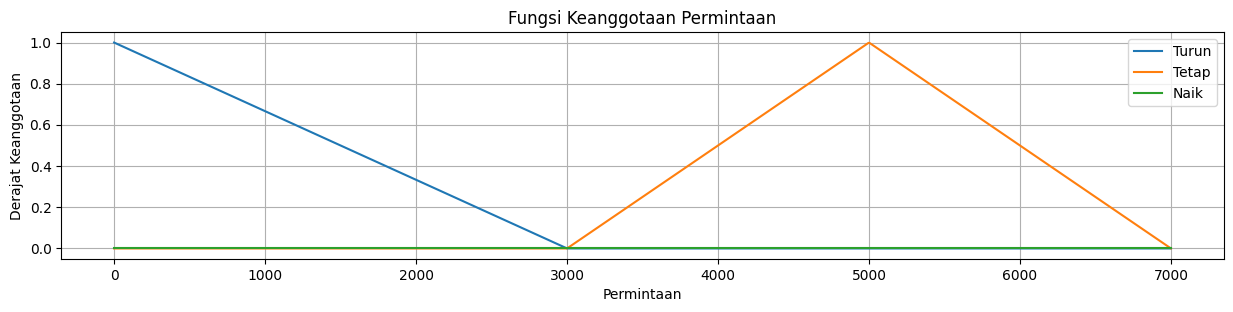

In [19]:
# Plot untuk permintaan
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.title("Fungsi Keanggotaan Permintaan")
demand_low.plot(x_demand)
demand_stable.plot(x_demand)
demand_high.plot(x_demand)
plt.xlabel("Permintaan")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()

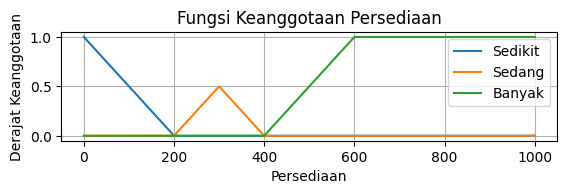

In [20]:
# Plot untuk persediaan
plt.subplot(3, 1, 2)
plt.title("Fungsi Keanggotaan Persediaan")
supply_low.plot(x_supply)
supply_medium.plot(x_supply)
supply_high.plot(x_supply)
plt.xlabel("Persediaan")
plt.ylabel("Derajat Keanggotaan")
plt.grid(True)
plt.legend()

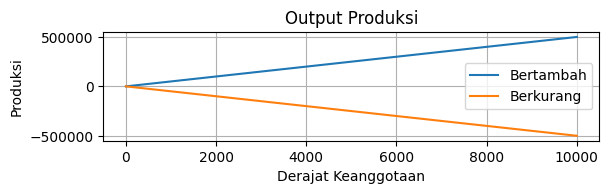

In [21]:
# Plot untuk output produksi
plt.subplot(3, 1, 3)
plt.title("Output Produksi")
output_bertambah = [output_functions["Bertambah"](x) for x in x_production]
output_berkurang = [output_functions["Berkurang"](x) for x in x_production]
plt.plot(x_production, output_bertambah, label="Bertambah")
plt.plot(x_production, output_berkurang, label="Berkurang")
plt.xlabel("Derajat Keanggotaan")
plt.ylabel("Produksi")
plt.grid(True)
plt.legend()


In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>